# 不均衡データ

**不均衡データ**（imbalanced data）は目的変数の分布が極端に偏っているためにおこる問題。

例えば目的変数が$y\in \{0, 1\}$の二値分類において1が90%あるデータの場合、全てに対して1を予測するだけのアルゴリズムであっても正解率（accuracy）は90%になる



きちんと分類できるデータであれば不均衡であってもきちんと分類できるが、そうでない場合は不均衡具合に影響を受けてしまう

きちんと分類できない領域については、サンプリングや誤差関数への重み付けなどにより均衡データに近づけて学習させる方法がある。

ただし、その場合は均衡データとして学習している（例えば二値分類なら50%/50%）ので、予測の確率値も50%がしきい値となるような高い値が出てくるため、確率をカリブレーション（calibration）して戻す必要がある

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def gen_data(scale = 1, p_minority = 0.1, n = 1000):
    n_minor = int(n * p_minority)
    n_major = int(n * (1 - p_minority))
    np.random.seed(0)
    y = np.append(
        np.zeros(shape=(n_major,)),
        np.ones(shape=(n_minor,)),
    )
    X = np.append(
        np.random.normal(loc=(-1, -1), scale=scale, size=(n_major, 2)),
        np.random.normal(loc=(1, 1), scale=scale, size=(n_minor, 2)),
        axis=0
    )
    return X, y


def plot_data(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X[y == 0, 0], X[y == 0, 1], label="y == 0", alpha=.7)
    ax.scatter(X[y == 1, 0], X[y == 1, 1], label="y == 1", alpha=.7)
    ax.set(xlabel="x1", ylabel="x2")
    ax.legend()
    fig.show()

## 上手く分類できないデータの場合

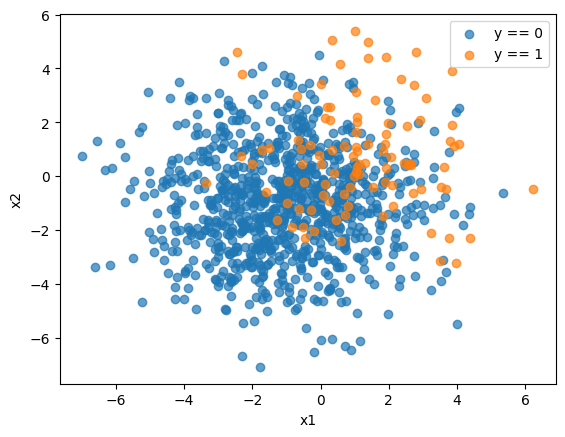

In [2]:
X, y = gen_data(scale = 2, p_minority = 0.1)
plot_data(X, y)

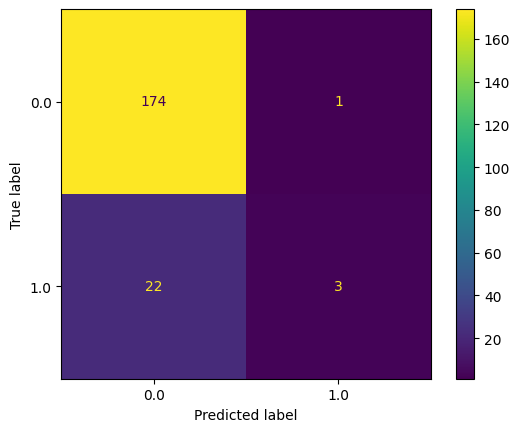

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [4]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

print(f"""
accuracy: {accuracy_score(y_test, y_pred):.3g}
balanced_accuracy: {balanced_accuracy_score(y_test, y_pred):.3g}
recall: {recall_score(y_test, y_pred):.3g}
precision: {precision_score(y_test, y_pred):.3g}
f1_score: {f1_score(y_test, y_pred):.3g}
""")


accuracy: 0.885
balanced_accuracy: 0.557
recall: 0.12
precision: 0.75
f1_score: 0.207



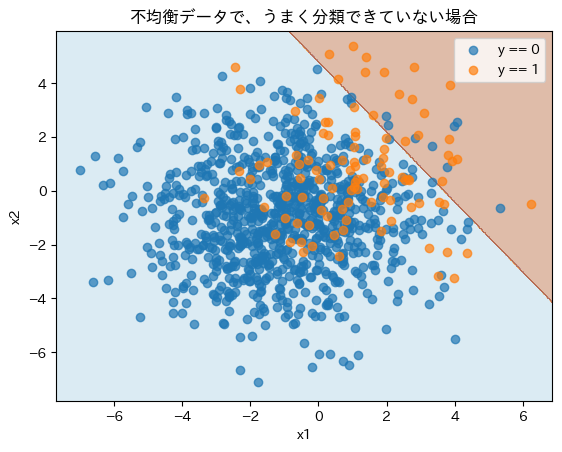

In [5]:
import japanize_matplotlib

x1_lim = (X[:, 0].min() * 1.1, X[:, 0].max() * 1.1)
x2_lim = (X[:, 1].min() * 1.1, X[:, 1].max() * 1.1)

X1, X2 = np.mgrid[x1_lim[0]:x1_lim[1]:1000j, x2_lim[0]:x2_lim[1]:1000j]
X_range= np.append(X1.reshape(-1, 1), X2.reshape(-1, 1), axis=1)
Y = clf.predict(X_range).reshape(X1.shape)

fig, ax = plt.subplots()
ax.contourf(X1, X2, Y, cmap='Paired', alpha=0.4)

ax.scatter(X[y == 0, 0], X[y == 0, 1], label="y == 0", alpha=0.7)
ax.scatter(X[y == 1, 0], X[y == 1, 1], label="y == 1", alpha=0.7)
# ax.set(xlabel="x1", ylabel="x2", title="Decision Boundary of Logistic Regression")
ax.set(xlabel="x1", ylabel="x2", title="不均衡データで、うまく分類できていない場合")
ax.legend()
fig.show()

## 分類しやすいデータの場合

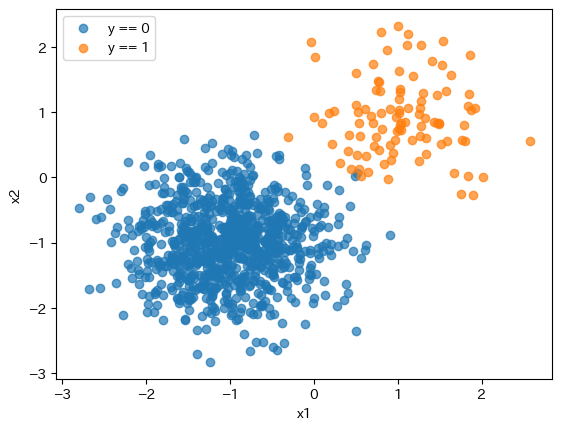

In [6]:
X, y = gen_data(scale = 0.6, p_minority = 0.1)
plot_data(X, y)

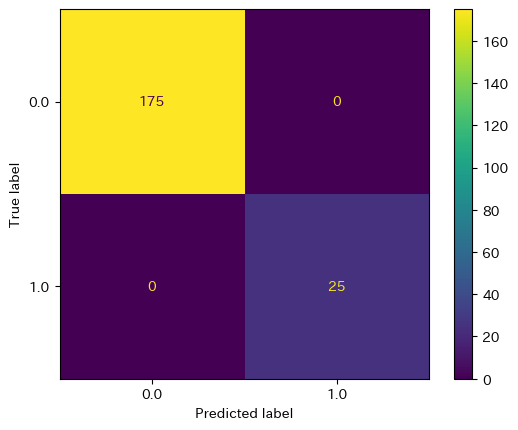

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [8]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

print(f"""
accuracy: {accuracy_score(y_test, y_pred):.3g}
balanced_accuracy: {balanced_accuracy_score(y_test, y_pred):.3g}
recall: {recall_score(y_test, y_pred):.3g}
precision: {precision_score(y_test, y_pred):.3g}
f1_score: {f1_score(y_test, y_pred):.3g}
""")


accuracy: 1
balanced_accuracy: 1
recall: 1
precision: 1
f1_score: 1



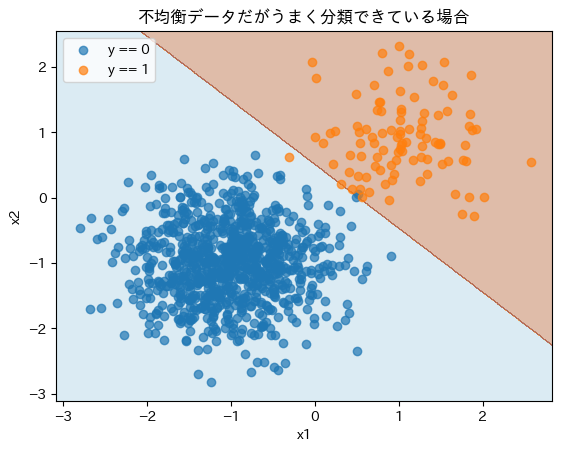

In [9]:
import japanize_matplotlib

x1_lim = (X[:, 0].min() * 1.1, X[:, 0].max() * 1.1)
x2_lim = (X[:, 1].min() * 1.1, X[:, 1].max() * 1.1)

X1, X2 = np.mgrid[x1_lim[0]:x1_lim[1]:1000j, x2_lim[0]:x2_lim[1]:1000j]
X_range= np.append(X1.reshape(-1, 1), X2.reshape(-1, 1), axis=1)
Y = clf.predict(X_range).reshape(X1.shape)

fig, ax = plt.subplots()
ax.contourf(X1, X2, Y, cmap='Paired', alpha=0.4)

ax.scatter(X[y == 0, 0], X[y == 0, 1], label="y == 0", alpha=0.7)
ax.scatter(X[y == 1, 0], X[y == 1, 1], label="y == 1", alpha=0.7)
# ax.set(xlabel="x1", ylabel="x2", title="Decision Boundary of Logistic Regression")
ax.set(xlabel="x1", ylabel="x2", title="不均衡データだがうまく分類できている場合")
# ax.set(xlabel="x1", ylabel="x2", title="不均衡データで、うまく分類できていない場合")
ax.legend()
fig.show()

## 参考

- [【記事更新】私のブックマーク「不均衡データ分類」 – 人工知能学会 (The Japanese Society for Artificial Intelligence)](https://www.ai-gakkai.or.jp/resource/my-bookmark/my-bookmark_vol37-no3/)
- [【ML Tech RPT. 】第4回 不均衡データ学習 (Learning from Imbalanced Data) を学ぶ(1) - Sansan Tech Blog](https://buildersbox.corp-sansan.com/entry/2019/03/05/110000)